IMAGE CLASIFICATION USING LOGISTIC REGRESSION AND SVM WITH FEATURE ENGINEERING

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from skimage.feature import hog
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from skimage.feature import local_binary_pattern as lbp


In [20]:
def imshow(image,title=None):
    plt.axis('off')
    plt.imshow(image,'gray')
    plt.show()
def showGridImage(image,label,gsize=5,titel=None):
    selected_indices=np.random.choice(len(images),size=gsize*gsize,replace=False)
    fig,axes=plt.subplots(gsize,gsize,figsize=(10,10))
    for i,ax in enumerate (axes.ravel()):
        index=selected_indices[i]
        image=images[index]
        label=labels[index]
        ax.imshow(image.reshape(100,100),'gray')
        ax.set_xticks([]) 
        ax.set_yticks([])
        ax.set_title(f"Image{classes[label]}")
    plt.suptitle(titel)
    plt.tight_layout()
    plt.show()
    

In [21]:
mainPath='./dataset'


In [22]:
mainPath = './dataset/'
classes = os.listdir(mainPath)
images = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath, cls)
    for imagName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath,imagName)
        image = cv2.imread(imgPath, 0)
        image=cv2.resize(image,(100,100))
        images.append(image.flatten())
        label= classes.index(cls)
        labels.append(label)

In [23]:
images = np.array(images)
labels= np.array(labels)

In [24]:
data = pd.DataFrame(images)

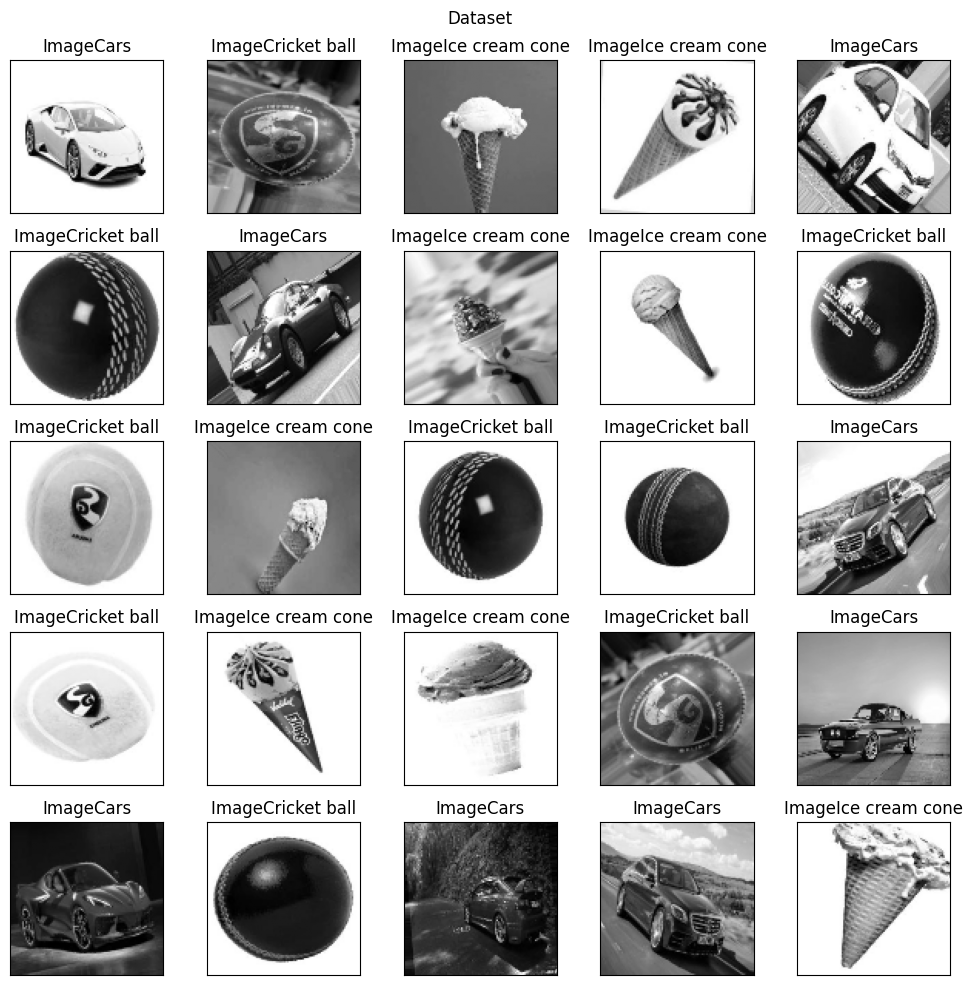

In [25]:
showGridImage(images, labels, 5, "Dataset")

split data

In [27]:
xTrain, xTest, yTrain, yTest = train_test_split(images, labels, test_size=0.2, random_state=0)

**fitting th machine learning model(logistic regression)**

In [41]:
LogisticReg=LogisticRegression(max_iter=1000)
LogisticReg.fit(xTrain,yTrain)

LogisticRegression(max_iter=1000)

predict data

In [46]:
predsClasses=LogisticReg.predict(xTest)

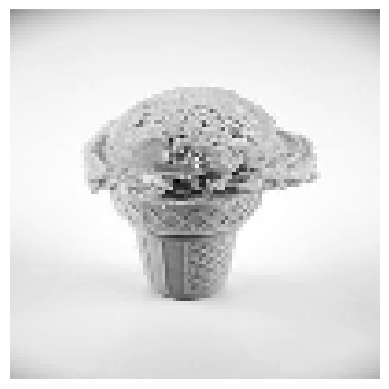

In [47]:
imshow(xTest[0].reshape(100,100),'Testimage')
Modelprediction=LogisticReg.predict([xTest[0]])

evaloation

In [49]:
trainAccuracy=LogisticReg.score(xTrain,yTrain)
testAccuracy=LogisticReg.score(xTest,yTest)
print(f'Training accuracy:{trainAccuracy*100:.2f}%')
print(f'Test accuracy:{testAccuracy*100:.2f}%')


Training accuracy:100.00%
Test accuracy:79.29%


confusion matrix(prediction aur acctual labels mojod hoty hain)

<Axes: >

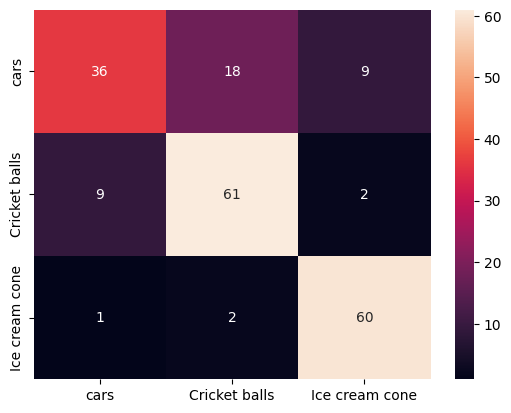

In [51]:
class_names=['cars','Cricket balls','Ice cream cone']
cmLogistic=confusion_matrix(yTest,predsClasses)
sns.heatmap(cmLogistic,annot=True,xticklabels=class_names,yticklabels=class_names,fmt='d')

show images with model predtict

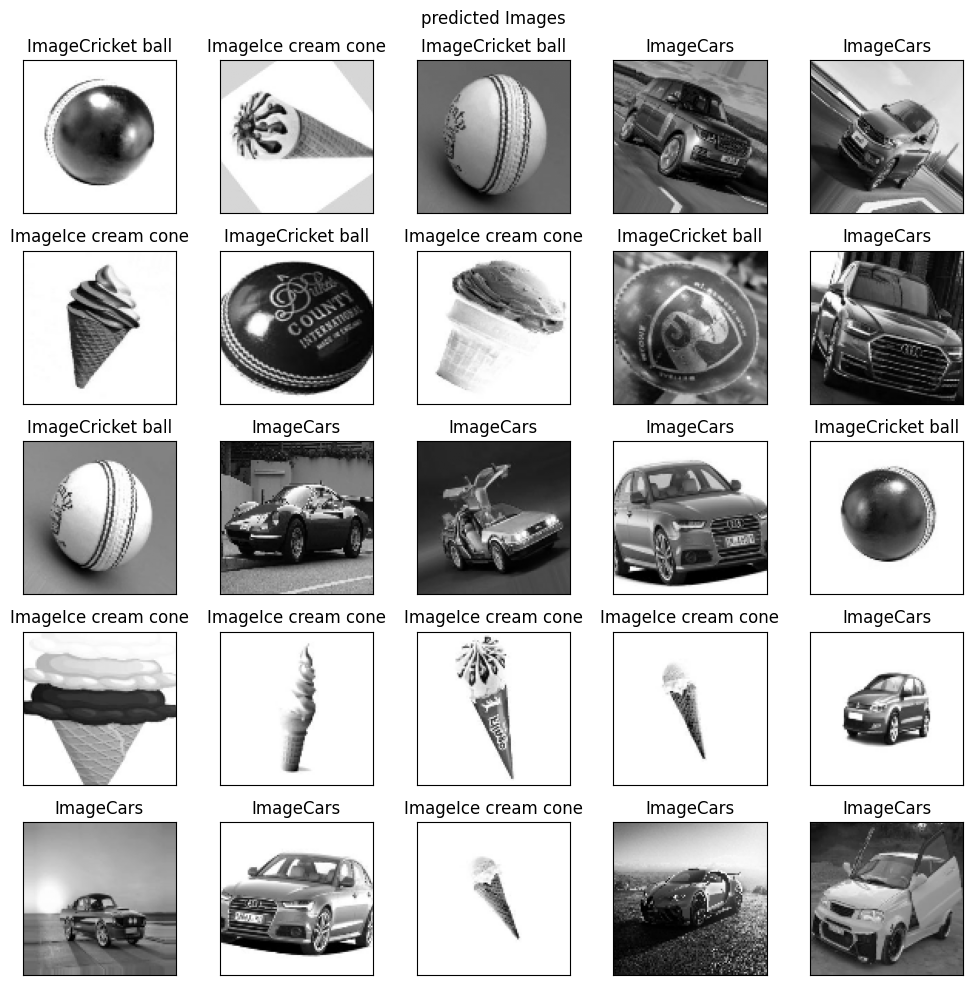

In [53]:
showGridImage(xTest, predsClasses,5,'predicted Images')

---

USING THE HOG FEATUAR DESCRIPTION FOR FEATURE EXTRACTIO

In [60]:
mainPath = './dataset/'
classes = os.listdir(mainPath)
hogimages = []
Hogfeatures=[]
labels = []
for i in classes:
    clsPath = os.path.join(mainPath, i)
    for imagName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath,imagName)
        image = cv2.imread(imgPath, 0)
        image=cv2.resize(image,(100,100))
        features,hogimages=hog(images,visualize=True)
        hogimages.append(hogimages)
        Hogfeatures.append(features)
        label= classes.index(i)
        labels.append(label)

AttributeError: 'numpy.ndarray' object has no attribute 'append'